In [8]:
#%run mylib.ipynb
import math
import numpy as np
%run mylib.ipynb

IndentationError: unexpected indent (Temp/ipykernel_17080/2525358880.py, line 13)

IndentationError: unexpected indent (Temp/ipykernel_17080/2525358880.py, line 13)

## QUESTION 1
$$ \frac{d y}{d x}=\frac{y \ln y}{x} where, y(2)=e $$ 
\
Use Explicit Euler And Predictor Collector


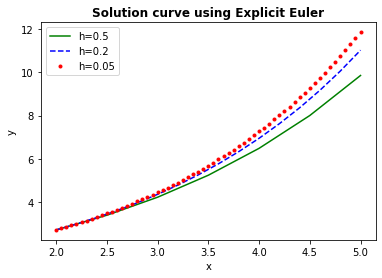

In [2]:
#using explicit euler method with 3 h values
func = lambda x,y: (y*math.log(y))/x

lists1=euler_forward_yours(func,0.5,2,2.71828,5)

lists2 =euler_forward_yours(func,0.2,2,2.71828,5)

lists3 =euler_forward_yours(func,0.05,2,2.71828,5)

#plotting the solution obtained using euler method on 1 graph
plt.plot(lists1[0],lists1[1],'g-',label='h=0.5')
plt.plot(lists2[0],lists2[1],'b--',label='h=0.2')
plt.plot(lists3[0],lists3[1],'r.',label='h=0.05')
plt.title('Solution curve using Explicit Euler',fontweight="bold")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

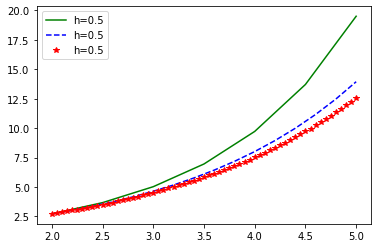

In [3]:
def euler_backward(func,step_size,x_0,y_0,x_n,newtonraphson_guess = 5):
        X=[x_0]
        Y=[y_0]
        N=int(abs(x_0-x_n)/step_size)                               #number of points to be plotted
        for i in range(N):
            x=X[-1]+step_size
            func_raph = lambda y_raphson: Y[-1] + step_size*func(x,y_raphson) - y_raphson
            y_nr,b,c=newtonraphson(func_raph,newtonraphson_guess,10**-5)
            y=Y[-1]+step_size*func(x,y_nr)                       #using forward derivative formula
            X.append(x)
            Y.append(y)
        return X,Y
func = lambda x,y: (y*math.log(y))/x

lists3=euler_backward(func,0.5,2,2.71828,5)
lists4 =euler_backward(func,0.2,2,2.71828,5)
lists5 =euler_backward(func,0.05,2,2.71828,5)

plt.plot(lists3[0],lists3[1],'g-',label='h=0.5')
plt.plot(lists4[0],lists4[1],'b--',label='h=0.5')
plt.plot(lists5[0],lists5[1],'r*',label='h=0.5')
plt.legend()
plt.show()

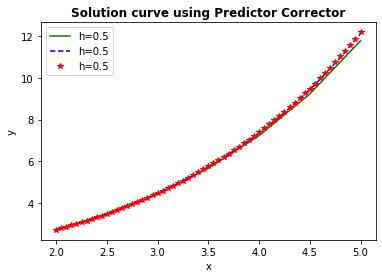

In [4]:
# Predictor Corrector Method

def predictor_corrector(func,step_size,x_0,y_0,x_n):  
        X=[x_0]
        Y=[y_0]
        N=int(abs(x_0-x_n)/step_size)                               #number of points to be plotted
        for i in range(N):
            x=X[-1]+step_size
            k1=step_size*func(X[-1],Y[-1])
            yp = Y[-1] + k1
            k2=step_size*func(x,yp)
            y_corrected =Y[-1] +(k1+k2)/2                          #using forward derivative formula
            X.append(x)
            Y.append(y_corrected)
        return X,Y
func = lambda x,y: (y*math.log(y))/x

lists6=predictor_corrector(func,0.5,2,2.71828,5)
lists7 =predictor_corrector(func,0.2,2,2.71828,5)
lists8 =predictor_corrector(func,0.05,2,2.71828,5)

plt.plot(lists6[0],lists6[1],'g-',label='h=0.5')
plt.plot(lists7[0],lists7[1],'b--',label='h=0.5')
plt.plot(lists8[0],lists8[1],'r*',label='h=0.5')
plt.title('Solution curve using Predictor Corrector',fontweight="bold")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Question 2

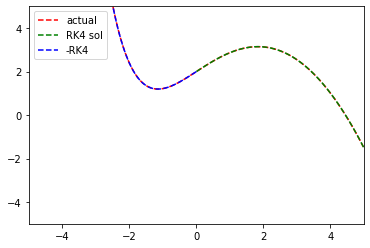

In [7]:
F=[lambda Y,x: Y[1],lambda Y,x:1-x-Y[1]]
x_o=0
Y_o=[[2],[1]]
S=RK4_notsolve_system(F,x_o,Y_o,0.05)
y1=S[0]
x1=S[2]
Y_o=[[2],[1]]
S_=RK4_notsolve_system(F,x_o,Y_o,-0.05)
y_=S_[0]
x_=S_[2]



x=np.arange(-5,5,0.01)
y=1+np.exp(-x)-x**2/2+2*x
plt.plot(x,y,"r--",label='actual')
plt.plot(x1,y1,"g--",label='RK4 sol')
plt.plot(x_,y_,"b--",label='-RK4')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()

## Question 3

velocity at t= 0  is 2.7136959346307776e-11


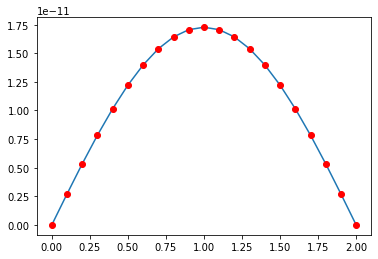

velocity at t= 0  is -3.5349501104064984e-13


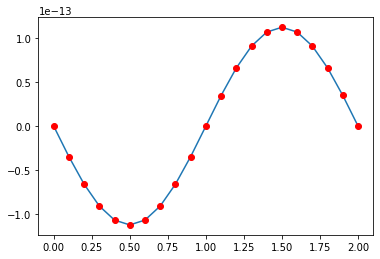

In [ ]:
# def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):
# this is func for d2y/dt2 =func
def d2ydt2(t, y, z):
    return -(math.pi**2)*y/4

# this is func for d2y/dt2 =func
def d2ydt3(t, y, z):
    return -(math.pi**2)*y

# z = dy/dt
def dydt(t, y, z):
    return z

# Define boundary values
t_initial = 0
t_final = 2
y_initial = 0
y_final = 0

t, y, z = shooting_method(d2ydt2, dydt, t_initial, y_initial, t_final, y_final, -2, 10, step_size=0.1)
plt.plot(t,y)
print(f"velocity at t= 0  is {z[0]}")

plt.plot(t,y,'ro')
plt.show()

t, y, z = shooting_method(d2ydt3, dydt, t_initial, y_initial, t_final, y_final, -2, 10, step_size=0.1)
plt.plot(t,y)
print(f"velocity at t= 0  is {z[0]}")

plt.plot(t,y,'ro')